# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import dill
import torch
import numpy as np

### Helper Functions

In [795]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages


def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    actions = leotris.player.strategy.policy_net(state).tolist()[0]
    actions = list(zip(action_names, actions))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        leotris.actions[int(torch.argmax(leotris.player.strategy.policy_net(state)))].name
    ))

### Load Data

## Method Analysis

### Random

Number of games played: 37700


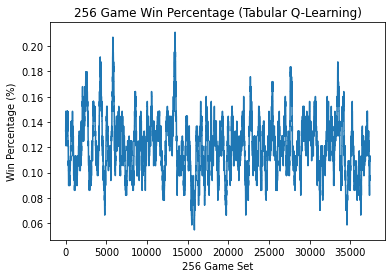

{'Strahd': 0.8797347480106101, 'Leotris': 0.12026525198938992}

In [3]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_random.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) -
               batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Ranged Aggression

Number of games played: 12000


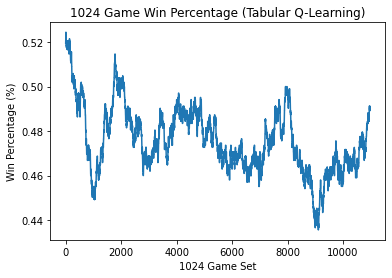

{'Strahd': 0.5225, 'Leotris': 0.4775}

In [738]:
batch_size = 1024
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_ranged_aggression.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Tabular Q-Learning

Number of games played: 7100


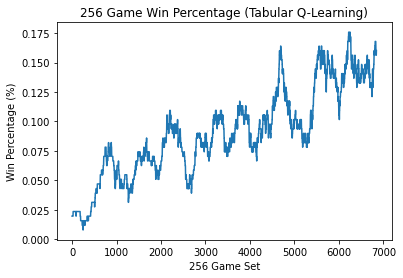

{'Strahd': 0.9094366197183099, 'Leotris': 0.09056338028169014}

In [5]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Linear Function Approximation

Number of games played: 67600


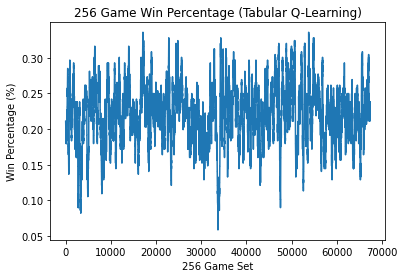

{'Leotris': 0.22146449704142013, 'Strahd': 0.7785355029585799}

In [6]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_linear_function_approximation.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### DQN

Number of games played: 1600


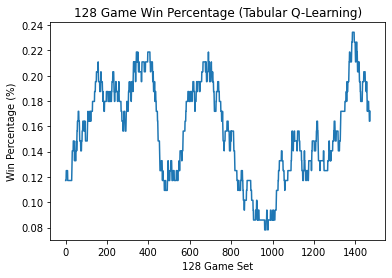

{'Strahd': 0.845625, 'Leotris': 0.154375}

In [782]:
batch_size = 128
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Double DQN:

Number of games played: 111600


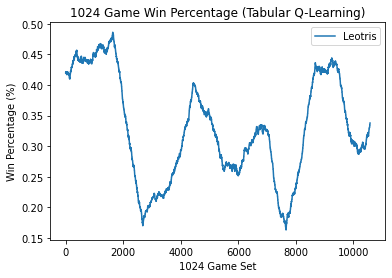

In [1046]:
batch_size = 1024
win_pcts = defaultdict(list)
creatures = ["Leotris"]

winner_list = dill.load(open("results/winner_list_double_DQN.pickle", "rb"))

print("Number of games played: {}".format(len(winner_list)))

for i in range(100000, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
    
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))

plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.show()

## Scratch

In [1043]:
leotris = dill.load(open("results/model_double_DQN_3.pickle", "rb"))
params = list(leotris.player.strategy.policy_net.parameters())
print("[[hp, enemy_hp, x, y, enemy_x, enemy_y, attacks_used, movement_used, progression]]\n")
# for param in params:
#     print("{}\n{}\n".format(param.T, param.T.shape))

[[hp, enemy_hp, x, y, enemy_x, enemy_y, attacks_used, movement_used, progression]]



In [1055]:
leotris = dill.load(open("results/model_double_DQN_3.pickle", "rb"))

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    -0.7, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    0.22, # hit points
    1.0, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    -0.7, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.1, # x pos
    0.2, # y pos
    0.2, # enemy x
    0.2, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    1.0, # number steps
]])

report_actions(state)
print()
state = torch.tensor([[
    1.0, # hit points
    0.01, # enemy hit points
    0.1, # x pos
    0.1, # y pos
    0.2, # enemy x
    0.2, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    -0.7, # number steps
]])

report_actions(state)

end: 	0.6958739757537842
left: 	0.1715838611125946
right: 	0.26113682985305786
up: 	0.17852962017059326
down: 	0.3749026656150818
shot: 	0.8622946739196777
-----Arrow Shot-----

end: 	1.082121729850769
left: 	-0.48869359493255615
right: 	-0.5019441843032837
up: 	-0.48140424489974976
down: 	-0.44658714532852173
shot: 	-0.21615512669086456
-----end_turn-----

end: 	0.8426898717880249
left: 	-0.03233864903450012
right: 	0.03207319974899292
up: 	-0.044302165508270264
down: 	0.1423695683479309
shot: 	0.5883266925811768
-----end_turn-----

end: 	1.0539875030517578
left: 	-0.4683140516281128
right: 	-0.47279250621795654
up: 	-0.4735338091850281
down: 	-0.4586907625198364
shot: 	-0.24108192324638367
-----end_turn-----


In [1010]:
params[-1]

Parameter containing:
tensor([6.3076, 6.0379, 6.3816, 5.8883, 6.3699, 6.5258], requires_grad=True)

In [1011]:
steps_to_finish = 800
penalty = -2
reward = 200
punishment = -700

total_penalty = steps_to_finish * penalty

cum_reward_suc = steps_to_finish * penalty + reward
cum_reward_fail = steps_to_finish * penalty + punishment

print("Cumulative reward on success: {}".format(cum_reward_suc))
print("Cumulative reward on failure: {}".format(cum_reward_fail))

Cumulative reward on success: -1400
Cumulative reward on failure: -2300


In [ ]:
hit = list()
n = 1000000
for i in range(n):
    roll = np.random.choice(20) + 1
    hit.append(roll > enemy_ac)

In [665]:
moves_per_turn = 4
enemy_health = 200
enemy_ac = 17
damage = 6
prob_hit = np.mean(hit)
print(prob_hit)

turns_to_win = enemy_health / (prob_hit * damage)
moves_to_win = turns_to_win * moves_per_turn
moves_to_win

0.150288


887.1854927428226

In [623]:
prob_explore = 0.05
n_moves = len(leotris.actions)
prob_diff_move = prob_explore * ((n_moves - 1) / n_moves)
prob_diff_move

0.04166666666666667

In [1054]:
my_final_pct = 0.28
enemy_final_pct = 0.22
((1 - enemy_final_pct) - (1 - my_final_pct)) * 100

6.000000000000005

In [1052]:
100 - 72

28